#inbuilt library function


In [ ]:
import numpy as np
from sklearn import linear_model, metrics
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

features, targets = fetch_california_housing(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

model = linear_model.SGDRegressor(max_iter=1000, learning_rate='constant')
model.fit(x_train, y_train)
output = model.predict(x_test)

print("Predictions:\n", output)
print("MAE:", metrics.mean_absolute_error(y_test, output))
print("MSE:", metrics.mean_squared_error(y_test, output))


Predictions:
 [1.89426412e+15 2.16262857e+15 1.97518563e+15 ... 2.00326771e+15
 1.50008875e+15 3.23592464e+15]
MAE: 2173049894192245.2
MSE: 5.140463460121674e+30


#Batch Gradient Descent

Epoch 0: θ0 = 0.0002, θ1 = 0.0010
Epoch 1000: θ0 = 0.0949, θ1 = 0.4201


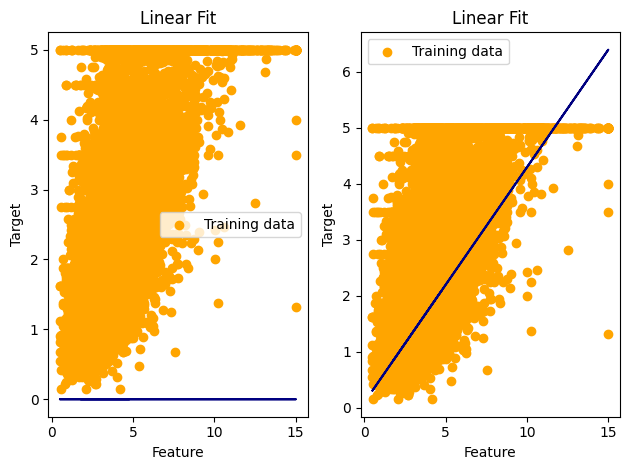

Epoch 2000: θ0 = 0.1138, θ1 = 0.4784
Epoch 3000: θ0 = 0.1219, θ1 = 0.4855


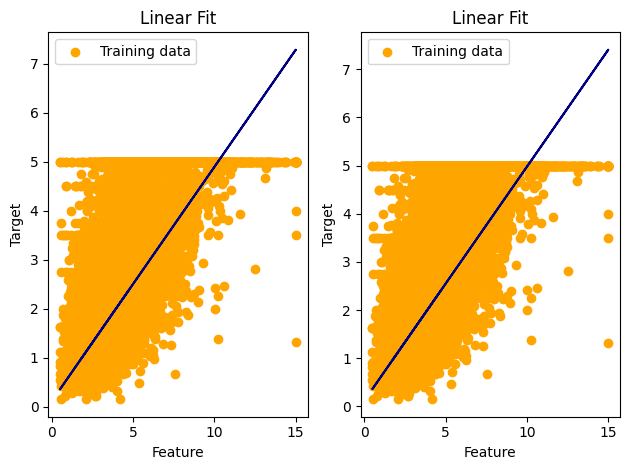

Epoch 4000: θ0 = 0.1283, θ1 = 0.4854
Epoch 5000: θ0 = 0.1345, θ1 = 0.4843


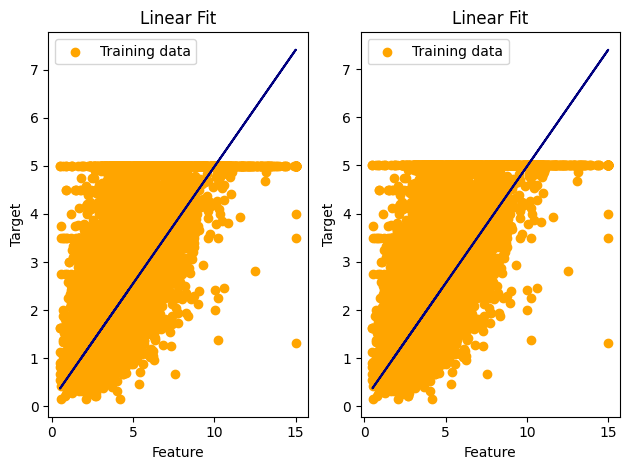

Epoch 6000: θ0 = 0.1404, θ1 = 0.4831
Epoch 7000: θ0 = 0.1463, θ1 = 0.4819


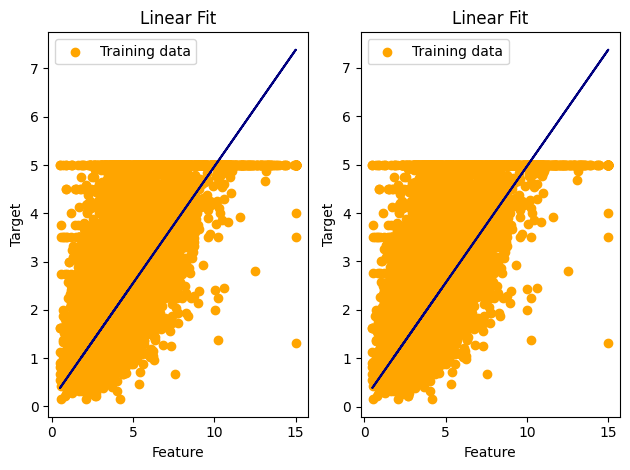

Epoch 8000: θ0 = 0.1521, θ1 = 0.4807
Epoch 9000: θ0 = 0.1577, θ1 = 0.4795


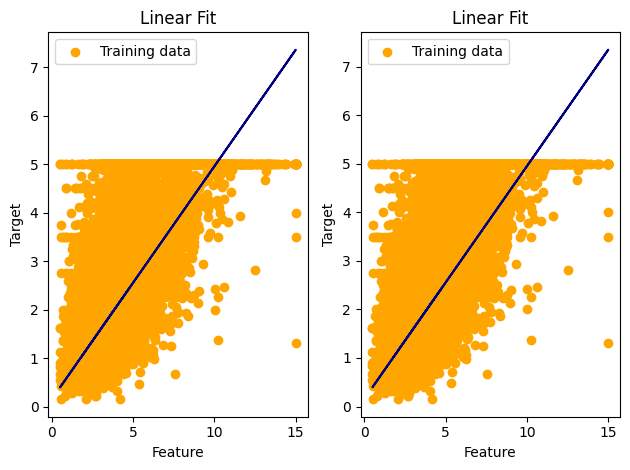

MAE: 0.6221386225423556
MSE: 0.7258694963332767


In [ ]:
import matplotlib.pyplot as plt

x = features[:, 0]
x_train, x_test, y_train, y_test = train_test_split(x, targets, test_size=0.2)

alpha = 0.0001
theta_0 = 0
theta_1 = 0
previous_total = 0

plot_index = 1

for epoch in range(10000):
    predicted = theta_0 + theta_1 * x_train

    if epoch > 0 and abs(np.sum(predicted) - previous_total) < 1e-3:
        print(f"Early stop at iteration {epoch}")
        break

    previous_total = np.sum(predicted)
    theta_0 -= alpha * np.mean(predicted - y_train)
    theta_1 -= alpha * np.mean((predicted - y_train) * x_train)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: θ0 = {theta_0:.4f}, θ1 = {theta_1:.4f}")
        plt.subplot(1, 2, plot_index)
        plt.scatter(x_train, y_train, color='orange', label='Training data')
        plt.plot(x_train, predicted, color='navy')
        plt.title("Linear Fit")
        plt.xlabel("Feature")
        plt.ylabel("Target")
        plt.legend()
        plot_index += 1
        if plot_index > 2:
            plt.tight_layout()
            plt.show()
            plot_index = 1

test_prediction = theta_0 + theta_1 * x_test
print("MAE:", metrics.mean_absolute_error(y_test, test_prediction))
print("MSE:", metrics.mean_squared_error(y_test, test_prediction))


#Mini Batch Gradient Descent

Epoch 0: θ0 = 0.06859, θ1 = 0.31084
Epoch 1000: θ0 = 0.44456, θ1 = 0.41909
Epoch 2000: θ0 = 0.44458, θ1 = 0.41909
Epoch 3000: θ0 = 0.44458, θ1 = 0.41909
Epoch 4000: θ0 = 0.44458, θ1 = 0.41909
Epoch 5000: θ0 = 0.44458, θ1 = 0.41909
Epoch 6000: θ0 = 0.44458, θ1 = 0.41909
Epoch 7000: θ0 = 0.44458, θ1 = 0.41909
Epoch 8000: θ0 = 0.44458, θ1 = 0.41909
Epoch 9000: θ0 = 0.44458, θ1 = 0.41909
MAE: 0.6297360362564307
MSE: 0.709112521446185


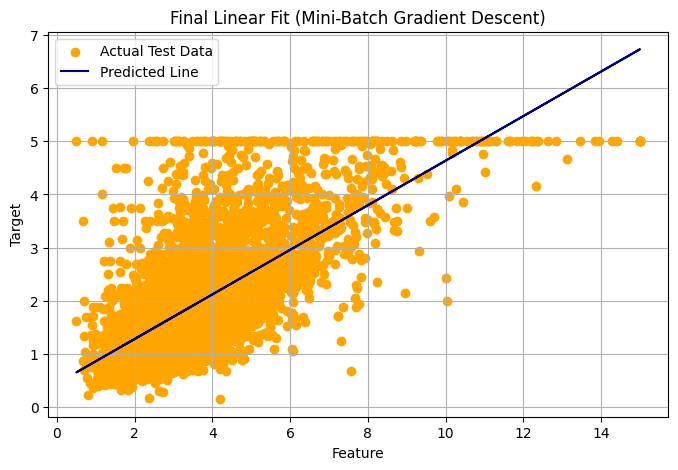

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

x = features[:, 0]
x_train, x_test, y_train, y_test = train_test_split(x, targets, test_size=0.2, random_state=42)

alpha = 0.0001
batch_size = 32
total_batches = int(np.ceil(len(x_train) / batch_size))
theta_0, theta_1 = 0, 0

for epoch in range(10000):
    for batch in range(total_batches):
        start_idx = batch * batch_size
        end_idx = start_idx + batch_size
        x_batch = x_train[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]

        batch_pred = theta_0 + theta_1 * x_batch
        theta_0 -= alpha * np.mean(batch_pred - y_batch)
        theta_1 -= alpha * np.mean((batch_pred - y_batch) * x_batch)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: θ0 = {theta_0:.5f}, θ1 = {theta_1:.5f}")

final_pred = theta_0 + theta_1 * x_test
print("MAE:", mean_absolute_error(y_test, final_pred))
print("MSE:", mean_squared_error(y_test, final_pred))

plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color='orange', label='Actual Test Data')
plt.plot(x_test, final_pred, color='navy', label='Predicted Line')
plt.title("Final Linear Fit (Mini-Batch Gradient Descent)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()


#Stochastic Gradient Descent

Epoch 0: θ0 = 0.19504, θ1 = 0.47816
Epoch 1000: θ0 = 0.44671, θ1 = 0.42641
Epoch 2000: θ0 = 0.44671, θ1 = 0.42641
Epoch 3000: θ0 = 0.44671, θ1 = 0.42641
Epoch 4000: θ0 = 0.44671, θ1 = 0.42641
Epoch 5000: θ0 = 0.44671, θ1 = 0.42641
Epoch 6000: θ0 = 0.44671, θ1 = 0.42641
Epoch 7000: θ0 = 0.44671, θ1 = 0.42641
Epoch 8000: θ0 = 0.44671, θ1 = 0.42641
Epoch 9000: θ0 = 0.44671, θ1 = 0.42641
MAE: 0.6355315043158458
MSE: 0.7102545707870372


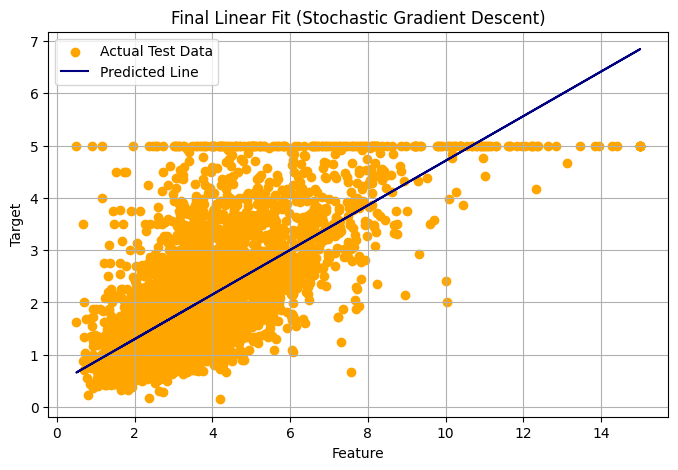

In [ ]:
theta_0, theta_1 = 0, 0

for epoch in range(10000):
    for i in range(len(x_train)):
        x_i, y_i = x_train[i], y_train[i]
        pred = theta_0 + theta_1 * x_i
        error = pred - y_i

        theta_0 -= alpha * error
        theta_1 -= alpha * error * x_i

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: θ0 = {theta_0:.5f}, θ1 = {theta_1:.5f}")

sgd_pred = theta_0 + theta_1 * x_test
print("MAE:", metrics.mean_absolute_error(y_test, sgd_pred))
print("MSE:", metrics.mean_squared_error(y_test, sgd_pred))

plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color='orange', label='Actual Test Data')
plt.plot(x_test, sgd_pred, color='navy', label='Predicted Line')
plt.title("Final Linear Fit (Stochastic Gradient Descent)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()


#Multivariate Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
df = pd.read_csv('/content/Multivariate dataset.csv')
X = df[['x3', 'x5', 'x6', 'x7', 'x8']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
learning_rate = 0.000000001
n_iterations = 10000
theta_0 = 0
theta_1 = 0
theta_2 = 0
theta_3 = 0
theta_4 = 0
theta_5 = 0
for i in range(n_iterations):
    predictions = (theta_0 +
                   theta_1 * X_train['x3'] +
                   theta_2 * X_train['x5'] +
                   theta_3 * X_train['x6'] +
                   theta_4 * X_train['x7'] +
                   theta_5 * X_train['x8'])
    errors = predictions - y_train
    theta_0 = theta_0 - learning_rate * errors.mean()
    theta_1 = theta_1 - learning_rate * (X_train['x3'] * errors).mean()
    theta_2 = theta_2 - learning_rate * (X_train['x5'] * errors).mean()
    theta_3 = theta_3 - learning_rate * (X_train['x6'] * errors).mean()
    theta_4 = theta_4 - learning_rate * (X_train['x7'] * errors).mean()
    theta_5 = theta_5 - learning_rate * (X_train['x8'] * errors).mean()
    if i % 1000 == 0:
        print(f"Iteration {i}: Theta 0: {theta_0:.5f}, Theta 1: {theta_1:.5f}, Theta 2: {theta_2:.5f}, Theta 3: {theta_3:.5f}, Theta 4: {theta_4:.5f}, Theta 5: {theta_5:.5f}")
y_pred = (theta_0 +
          theta_1 * X_test['x3'] +
          theta_2 * X_test['x5'] +
          theta_3 * X_test['x6'] +
          theta_4 * X_test['x7'] +
          theta_5 * X_test['x8'])
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Iteration 0: Theta 0: 0.00003, Theta 1: 0.04129, Theta 2: 0.00086, Theta 3: 0.00035, Theta 4: 0.13438, Theta 5: 0.18400
Iteration 1000: Theta 0: -0.00154, Theta 1: 1.16387, Theta 2: -0.03789, Theta 3: -0.03492, Theta 4: 8.63043, Theta 5: 14.42414
Iteration 2000: Theta 0: -0.00519, Theta 1: 0.95900, Theta 2: -0.13738, Theta 3: -0.09685, Theta 4: 7.56915, Theta 5: 15.26612
Iteration 3000: Theta 0: -0.00889, Theta 1: 0.92327, Theta 2: -0.23791, Theta 3: -0.15986, Theta 4: 6.71085, Theta 5: 15.91338
Iteration 4000: Theta 0: -0.01266, Theta 1: 0.90541, Theta 2: -0.33996, Theta 3: -0.22401, Theta 4: 6.02973, Theta 5: 16.42446
Iteration 5000: Theta 0: -0.01648, Theta 1: 0.89229, Theta 2: -0.44325, Theta 3: -0.28909, Theta 4: 5.49021, Theta 5: 16.82917
Iteration 6000: Theta 0: -0.02034, Theta 1: 0.88215, Theta 2: -0.54753, Theta 3: -0.35490, Theta 4: 5.06291, Theta 5: 17.14980
Iteration 7000: Theta 0: -0.02423, Theta 1: 0.87432, Theta 2: -0.65257, Theta 3: -0.42127, Theta 4: 4.72446, Theta 5: 

#Normal Equation

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn import metrics
from numpy.linalg import inv
import numpy.linalg as linalg
X, y = fetch_california_housing(return_X_y=True)
X_train_temp = X[0:15000, :]
y_train = y[0:15000]
X_test_temp = X[15000:, :]
y_test = y[15000:]
X_train = np.zeros((X_train_temp.shape[0], X_train_temp.shape[1] + 1))
X_train[:, 0] = 1
X_train[:, 1:] = X_train_temp
X_test = np.zeros((X_test_temp.shape[0], X_test_temp.shape[1] + 1))
X_test[:, 0] = 1
X_test[:, 1:] = X_test_temp
try:
    XTX = X_train.T @ X_train
    XTX_inv = inv(XTX)
except linalg.LinAlgError as e:
    print(f"[Matrix Inversion Error] → {e}")
    print("Detected singular matrix in (XᵀX). Switching to pseudo-inverse (pinv) for stability.")
    XTX = X_train.T @ X_train
    XTX_inv = linalg.pinv(XTX)

XTY = X_train.T @ y_train
theta = XTX_inv @ XTY

y_pred_train = X_train @ theta
y_pred_test = X_test @ theta

print("\n Training Set Evaluation")
print(f"-> Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train):.5f}")

print("\n Testing Set Evaluation")
print(f"-> Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred_test):.5f}")



 Training Set Evaluation
-> Mean Squared Error (Train): 0.50842

 Testing Set Evaluation
-> Mean Squared Error (Test): 0.60175
